# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
# %matplotlib inline
import numpy as np

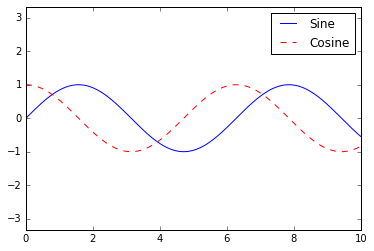

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn off the frame:

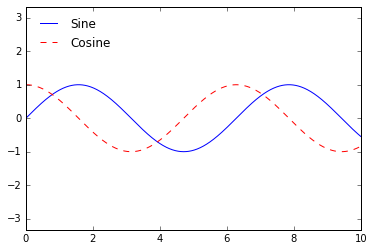

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

We can use the ``ncol`` command to specify the number of columns in the legend:

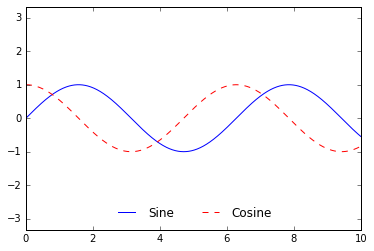

In [5]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:

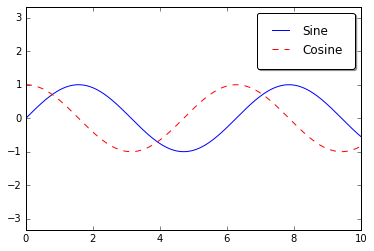

In [6]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

For more information on available legend options, see the ``plt.legend`` docstring.

## Choosing Elements for the Legend

As we have already seen, the legend includes all labeled elements by default.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.
The ``plt.plot()`` command is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to ``plt.legend()`` will tell it which to identify, along with the labels we'd like to specify:

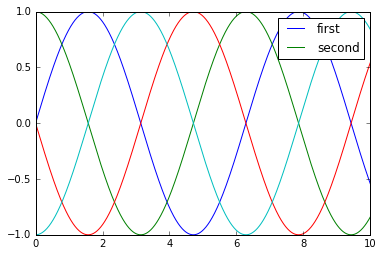

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

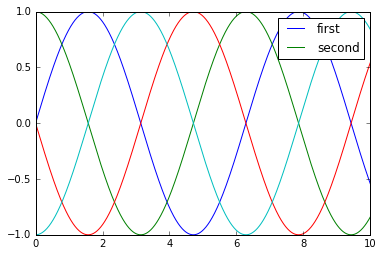

In [ ]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);
# Adds a legend to the plot, which shows labels for the lines.
# framealpha=1: Makes the legend box fully opaque (no transparency).
# frameon=True: Ensures the legend box is displayed with a border.

Notice that by default, the legend ignores all elements without a ``label`` attribute set.

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

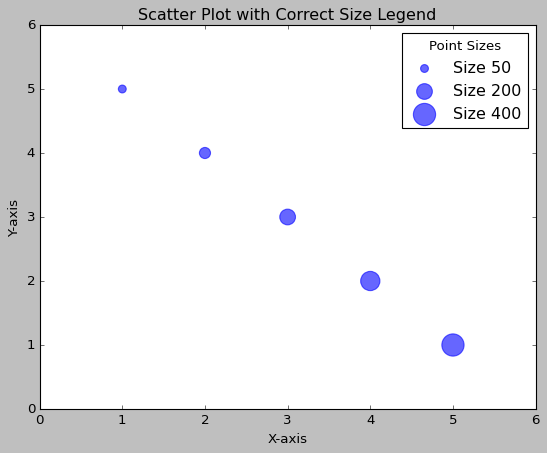

In [5]:
import matplotlib.pyplot as plt

# Simple data
x = [1, 2, 3, 4, 5]  # X-axis values
y = [5, 4, 3, 2, 1]  # Y-axis values
sizes = [50, 100, 200, 300, 400]  # Point sizes

# Create a scatter plot
plt.scatter(x, y, s=sizes, color='blue', alpha=0.6)

# Add a custom legend for point sizes
size_labels = [50, 200, 400]  # Example sizes to show in the legend
legend_handles = [
    plt.scatter([], [], s=size, color='blue', alpha=0.6) for size in size_labels
]

# Add the legend with scatterpoints=1 to fix the issue
plt.legend(
    legend_handles,
    [f"Size {size}" for size in size_labels],
    title="Point Sizes",
    loc="upper right",
    scatterpoints=1  # Ensures only 1 point per size in the legend
)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Correct Size Legend")

# Show the plot
plt.show()

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.

Finally, note that for geographic data like this, it would be clearer if we could show state boundaries or other map-specific elements.
For this, an excellent choice of tool is Matplotlib's Basemap addon toolkit, which we'll explore in [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb).

## Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.
We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add the second artist to the plot:

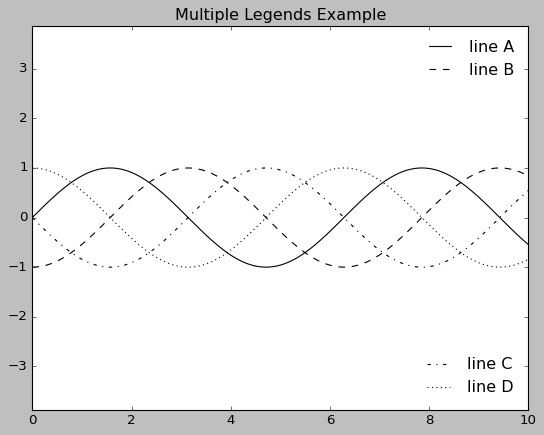

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.legend import Legend

# Step 1: Create a figure and axis object
fig, ax = plt.subplots()  # Create a figure and axis for plotting

# Step 2: Initialize variables
lines = []  # This will hold the plotted line objects
styles = ['-', '--', '-.', ':']  # Different line styles for the plot
# Generate 1000 points evenly spaced between 0 and 10
x = np.linspace(0, 10, 1000)

# Step 3: Plot multiple lines with different styles
for i in range(4):  # Loop through the 4 styles
    # Create a sine wave shifted by i * pi/2 and add it to the axis
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')

# Step 4: Set the axis properties
ax.axis('equal')  # Make the x and y axis scales equal

# Step 5: Add the first legend
# lines[:2]: First two lines are used in this legend
# ['line A', 'line B']: Labels for the first two lines
# loc='upper right': Place this legend in the upper-right corner
# frameon=False: Remove the box around the legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# Step 6: Add a second legend manually
# lines[2:]: Remaining two lines for the second legend
# ['line C', 'line D']: Labels for the second two lines
# loc='lower right': Place this legend in the lower-right corner
# frameon=False: Remove the box around this legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg)  # Add the second legend to the axis

# Step 7: Add title and display the plot
plt.title("Multiple Legends Example")  # Add a title to the plot
plt.show()  # Display the plot

This is a peek into the low-level artist objects that comprise any Matplotlib plot.
If you examine the source code of ``ax.legend()`` (recall that you can do this with within the IPython notebook using ``ax.legend??``) you'll see that the function simply consists of some logic to create a suitable ``Legend`` artist, which is then saved in the ``legend_`` attribute and added to the figure when the plot is drawn.

<!--NAVIGATION-->
< [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb) | [Contents](Index.ipynb) | [Customizing Colorbars](04.07-Customizing-Colorbars.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.06-Customizing-Legends.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
